In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2

In [78]:
X = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv')
y = pd.read_csv('/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv')

In [79]:
X.shape

(9690, 2304)

In [81]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


## Data Exploration

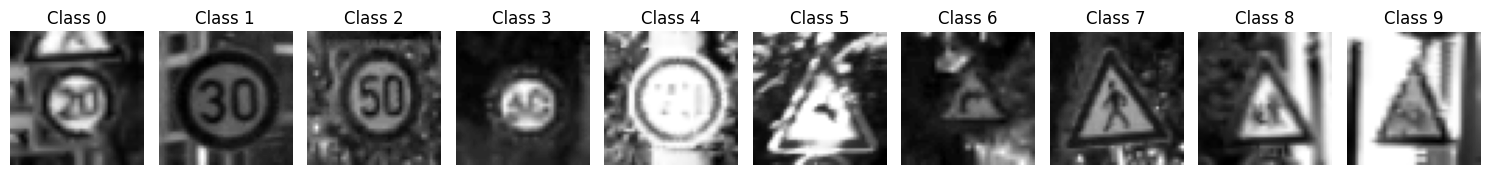

In [82]:
# Convert the dataframes to numpy arrays
X_num = X.to_numpy()
y_num = y.to_numpy().flatten()

# Display one image from each class
unique_classes = np.unique(y_num)
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 2))

for i, cls in enumerate(unique_classes):
    index = np.where(y == cls)[0][0]  # Find the index of the first occurrence of each class
    image = X_num[index].reshape(48, 48)  # Reshape the image to 48x48 pixels
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Class {int(cls)}')

plt.tight_layout()
plt.show()

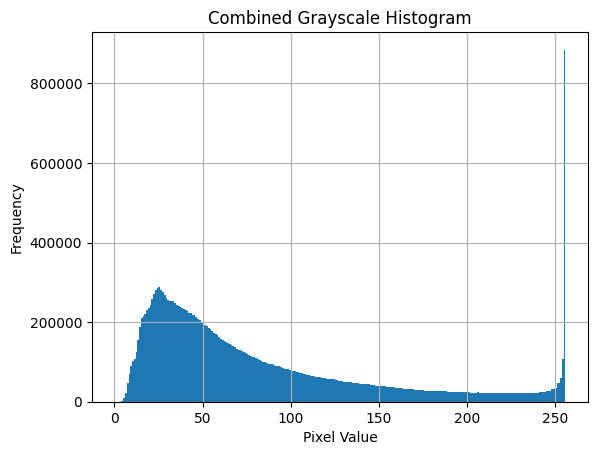

In [83]:
#Create a histogram for brightness density (occurance of every value/pixel brightness)
combined_pixel_series = X.stack()
histogram = combined_pixel_series.hist(bins=256, range=(0, 256))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Combined Grayscale Histogram')
plt.show()

**Conclusion:** We can see spike on 255 and higher frequency between 0 &amp; 50

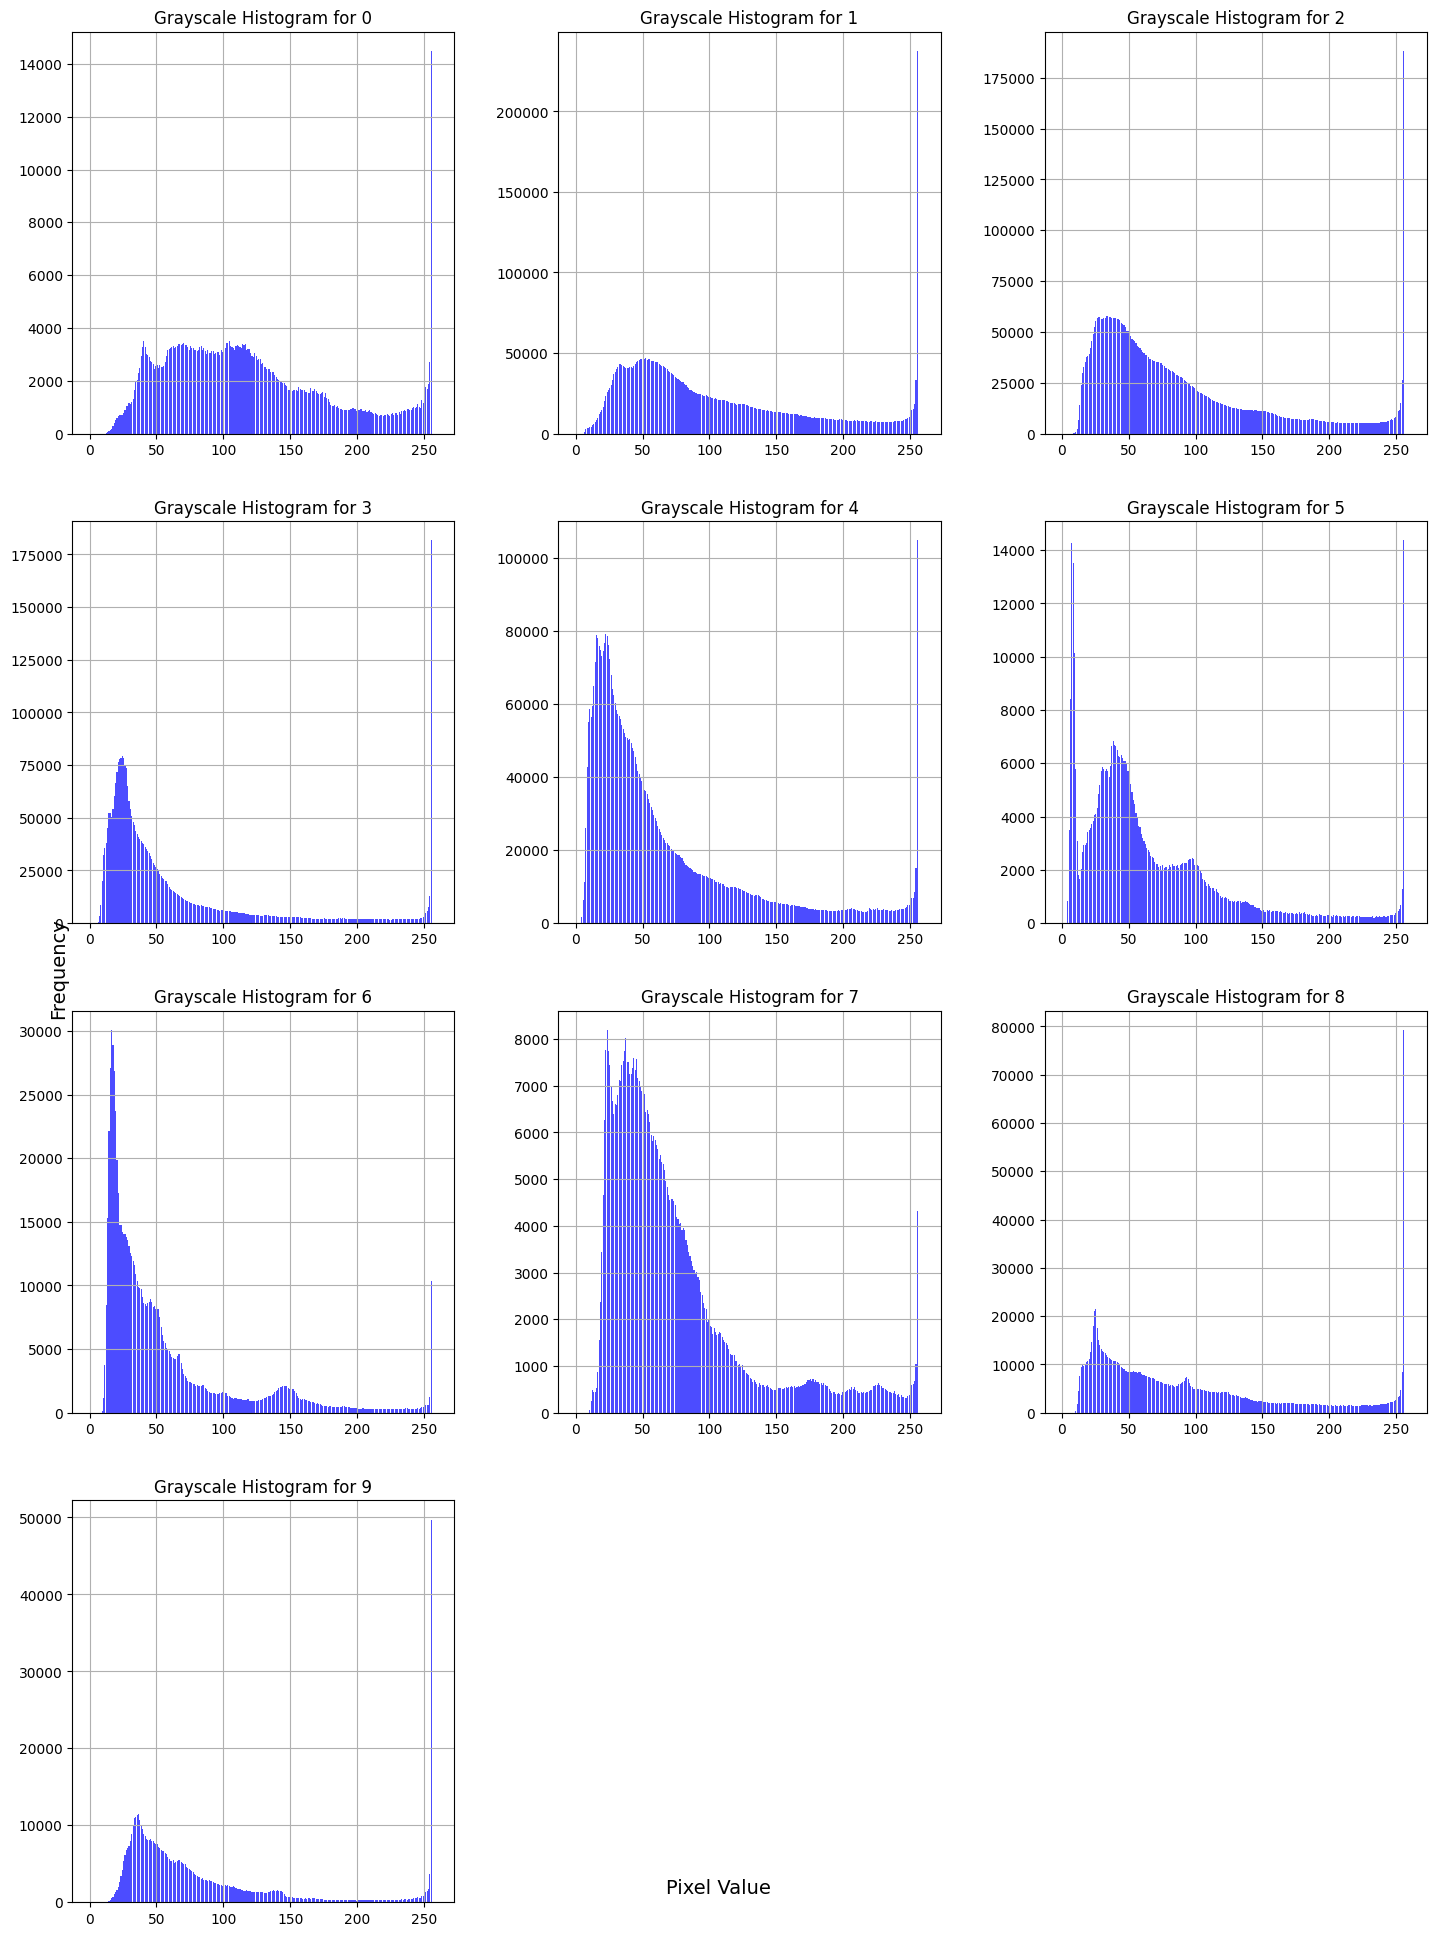

In [92]:
import math

class_labels = y['0'].unique()
n_classes = len(class_labels)

# Calculate number of rows and columns for subplots
n_cols = 3  # For instance, 3 plots per row
n_rows = math.ceil(n_classes / n_cols)

# Initialize the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Loop through each unique class label
for index, class_label in enumerate(class_labels):
    class_data = X[y['0'] == class_label]
    combined_pixel_series = class_data.stack()
    
    # Plot the histogram
    histogram = combined_pixel_series.hist(ax=axes[index], bins=260, range=(0, 260), 
                                           color='blue', alpha=0.7, rwidth=0.8)
    
    # Set title for each subplot
    axes[index].set_title(f'Grayscale Histogram for {class_label}', fontsize=12)
    
    # Remove x and y axis labels to avoid clutter
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    
    # Add minor grid lines for better visibility
    axes[index].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Delete the unused axes (empty graphs)
for i in range(n_classes, n_cols * n_rows):
    fig.delaxes(axes[i])

# Set common x and y labels for the entire figure
fig.text(0.5, 0.04, 'Pixel Value', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=14)

# Adjust the layout
plt.tight_layout(pad=3)
plt.show()

**Conclusion:** Each class has different distribution of the pixels, which make them really different from each other

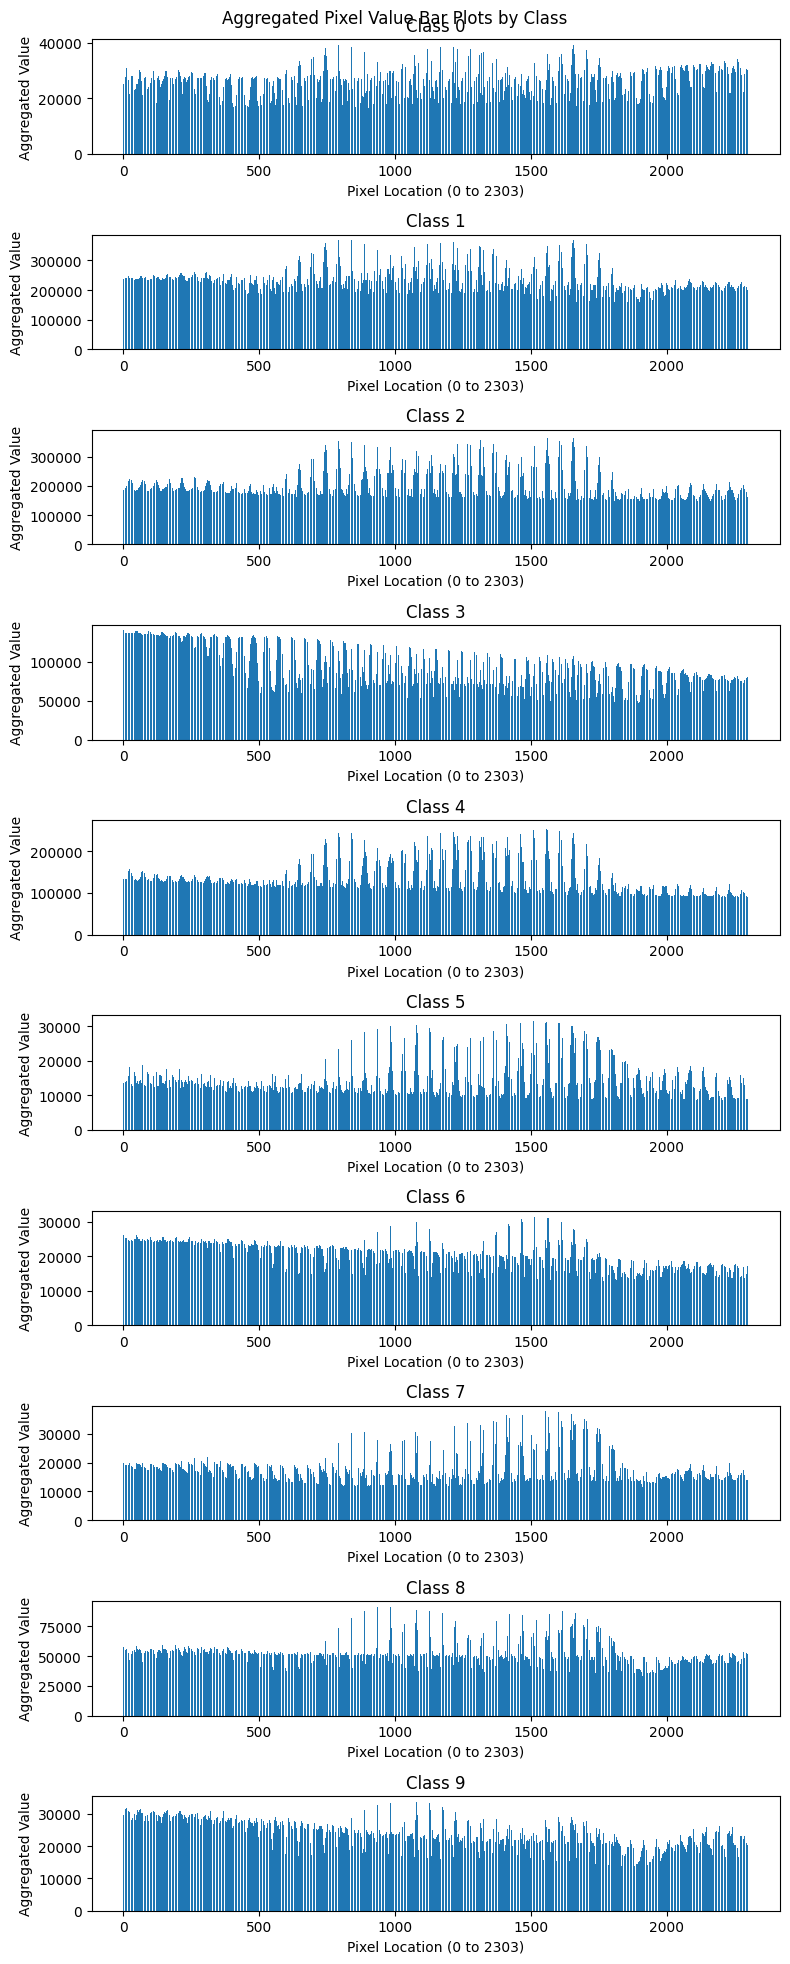

In [70]:
# plotting a histogram per class showing the aggregated value against the location of a particular pixel
unique_class_labels = y['0'].unique()
fig, axes = plt.subplots(len(unique_class_labels), figsize=(8, 2 * len(unique_class_labels)))
fig.suptitle('Aggregated Pixel Value Bar Plots by Class')

for i, class_label in enumerate(unique_class_labels):
    filtered_trainDataSet = X[y['0'] == class_label]
    combined_pixel_df = filtered_trainDataSet.iloc[:, :-1]
    aggregated_values = combined_pixel_df.sum()
    axes[i].bar(range(2303), aggregated_values)
    axes[i].set_title(f'Class {class_label}')
    axes[i].set_xlabel('Pixel Location (0 to 2303)')
    axes[i].set_ylabel('Aggregated Value')

plt.tight_layout()
plt.show()

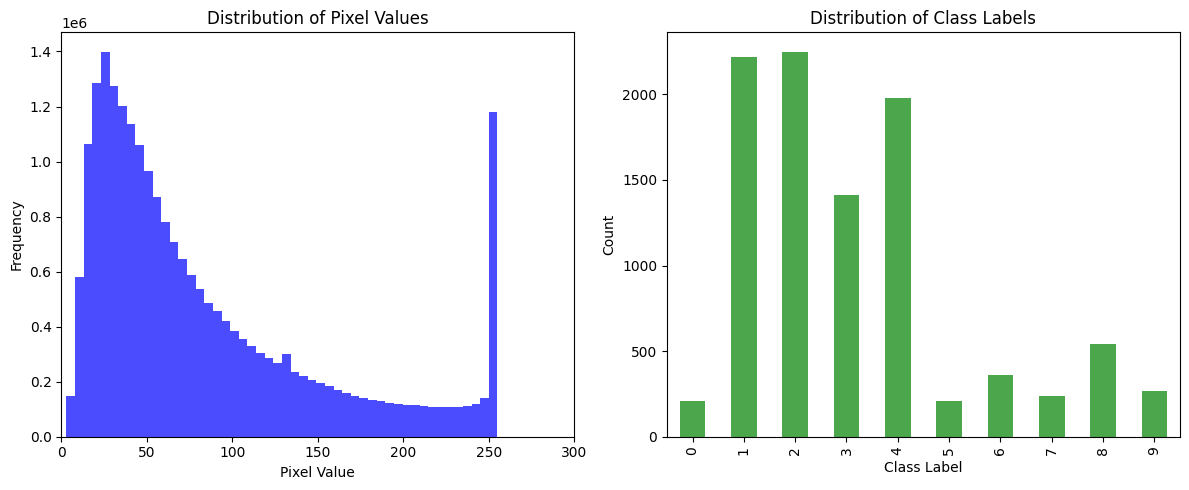

In [91]:
# Plotting the distribution of pixel values and class labels
plt.figure(figsize=(12, 5))

# Distribution of pixel values
plt.subplot(1, 2, 1)
plt.hist(X.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Values')
plt.xlim(0, 300)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Distribution of class labels
plt.subplot(1, 2, 2)
y['0'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
**Conclusin:** We have alredy said about 

## Data Preprocessing

In [6]:
# Check for missing values in the features and labels
missing_features = X.isnull().sum().sum()
missing_labels = y.isnull().sum().sum()

missing_features, missing_labels

(0, 0)

In [8]:
# Normalize the data to range [0, 1]
x_train_normalized = X / 255

In [9]:
x_train_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.000000,0.003922,0.007843,0.011765,0.015686,0.019608,0.023529,0.027451,0.031373,0.035294,...,8.996078,9.000000,9.003922,9.007843,9.011765,9.015686,9.019608,9.023529,9.027451,9.031373
1,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
2,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
3,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
4,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098


### `train_test_split`

In [10]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x_train_normalized, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.249
              precision    recall  f1-score   support

           0       0.05      0.16      0.07        43
           1       0.55      0.31      0.40       444
           2       0.43      0.19      0.27       450
           3       0.41      0.20      0.27       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.48      0.13      0.20       108
           9       0.35      0.30      0.32        54

    accuracy                           0.25      1939
   macro avg       0.31      0.32      0.23      1939
weighted avg       0.44      0.25      0.28      1939



### `StratifiedKFold`

In [11]:
# Cross-validation with Naive Bayes
cv = StratifiedKFold(n_splits=10)
cross_val_scores = cross_val_score(GaussianNB(), x_train_normalized, y.values.ravel(), cv=cv)

cross_val_scores.mean().round(3), cross_val_scores.std().round(3)


(0.202, 0.048)

### Instead of normalization, we try Standardisation

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_standard = scaler.fit_transform(X)


In [13]:
x_standard = pd.DataFrame(x_standard)

In [14]:
x_standard.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-1.156486,-1.143467,-1.129121,-1.116937,-1.108086,-1.097942,-1.088115,-1.076435,-1.066219,-1.056493,...,32.126952,32.114243,32.149028,32.286308,32.425730,32.608075,32.744214,32.980028,33.163946,33.147089
1,-0.150277,-0.161907,-0.172400,-0.097526,-0.036208,0.027894,0.183250,0.376631,0.348283,0.382223,...,0.210212,0.100219,0.005439,0.075388,0.190789,0.378612,0.447187,0.442173,0.404060,0.391116
2,-0.214777,-0.187737,-0.133614,-0.149142,-0.178264,-0.192097,-0.011347,0.220946,0.555916,0.447030,...,0.340366,0.302474,0.193329,0.089891,-0.012954,0.056902,0.212406,0.471713,0.493122,0.494915
3,-0.227678,-0.187737,-0.133614,-0.162046,-0.113693,-0.010928,0.196223,0.246893,-0.054007,-0.006619,...,0.369289,0.331368,0.236688,0.133399,0.045258,0.027656,0.080342,0.176317,0.314999,0.405945
4,-0.292178,-0.252313,-0.198258,-0.123334,0.041277,0.222003,0.261089,0.078234,-0.274617,0.122995,...,0.571752,0.288027,0.222235,0.162405,0.103470,0.042279,0.021647,0.058159,0.196250,0.302146


### Applying standardized data to Gaussian Naive Bayes model

In [15]:
# Splitting the data into training and validation sets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_standard, y_train_standard.values.ravel())
y_pred_standard = gnb.predict(X_test_standard)

# Calculating the metrics
accuracy = accuracy_score(y_test_standard, y_pred_standard)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.249
              precision    recall  f1-score   support

           0       0.05      0.16      0.07        43
           1       0.55      0.31      0.40       444
           2       0.43      0.19      0.27       450
           3       0.41      0.20      0.27       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.48      0.13      0.20       108
           9       0.35      0.30      0.32        54

    accuracy                           0.25      1939
   macro avg       0.31      0.32      0.23      1939
weighted avg       0.44      0.25      0.28      1939



## Feature Selection

### 1. One vs All

In [16]:
def top_features_for_class(X, y, label, num_features):
    # Use OneVsAll strategy: set current class to 1, all other classes to 0
    y_binary = (y == label).astype(int)
    
    # Select k best features for the current class using chi2 statistic
    k_best = SelectKBest(chi2, k=num_features)
    k_best.fit(X, y_binary)
    
    return k_best.get_support(indices=True)

# Extract top features for each class
top_features = {label: top_features_for_class(x_train_normalized, y, label, 20) for label in range(10)}

top_features


{0: array([2117, 2164, 2165, 2166, 2167, 2168, 2211, 2212, 2213, 2214, 2215,
        2216, 2217, 2259, 2260, 2261, 2262, 2263, 2264, 2265]),
 1: array([1025, 1026, 1071, 1072, 1073, 1074, 1119, 1120, 1121, 1166, 1167,
        1168, 1214, 1215, 1216, 1262, 1263, 1309, 1310, 1311]),
 2: array([ 795,  843,  981,  982, 1029, 1030, 1031, 1135, 1267, 1268, 1269,
        1311, 1312, 1314, 1315, 1316, 1317, 1363, 1364, 1365]),
 3: array([1169, 1170, 1171, 1216, 1217, 1218, 1219, 1220, 1264, 1265, 1266,
        1267, 1311, 1312, 1313, 1314, 1359, 1360, 1361, 1362]),
 4: array([ 983, 2145, 2146, 2147, 2148, 2194, 2195, 2196, 2247, 2248, 2265,
        2266, 2267, 2268, 2269, 2270, 2293, 2294, 2295, 2296]),
 5: array([1459, 1460, 1461, 1506, 1507, 1508, 1509, 1694, 1695, 1696, 1713,
        1714, 1742, 1743, 1744, 1745, 1760, 1761, 1791, 1792]),
 6: array([ 696,  697,  742,  743,  744,  745,  746,  747,  792,  793,  794,
         795,  841,  842, 1086, 1134, 1182, 1216, 1264, 1312]),
 7: array([14

In [ ]:
# Creating reduced data sets
def create_dataset(features_dict, num_features):
    unique_features = np.unique(np.concatenate([features[:num_features] for features in features_dict.values()]))
    return x_train_normalized.iloc[:, unique_features]

dataset_50 = create_dataset(top_features, 5)
dataset_100 = create_dataset(top_features, 10)
dataset_200 = create_dataset(top_features, 20)

dataset_50.shape, dataset_100.shape, dataset_200.shape


((9691, 46), (9691, 88), (9691, 145))

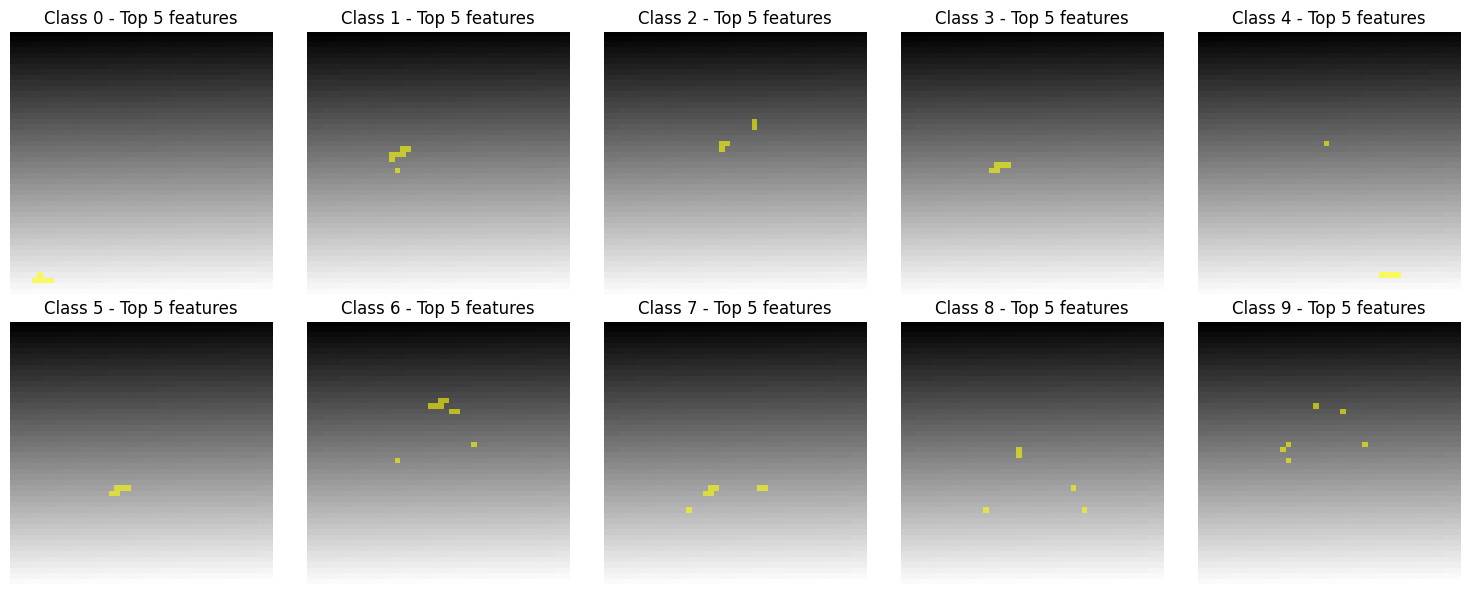

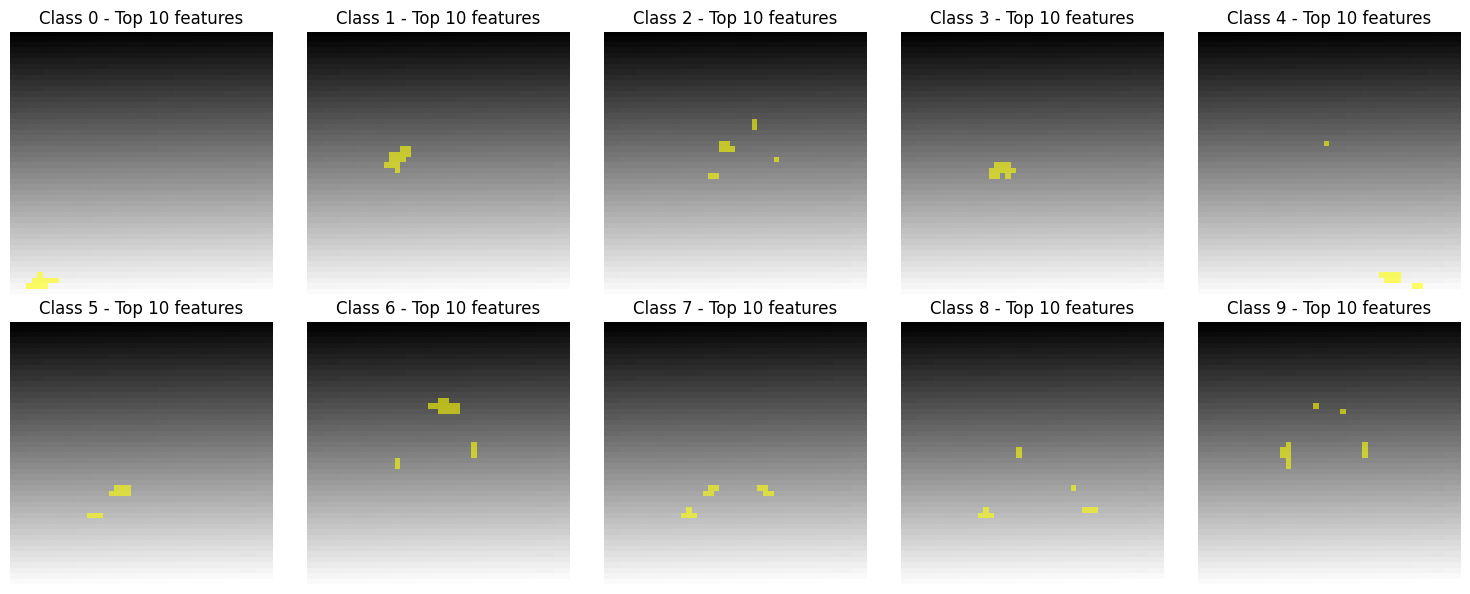

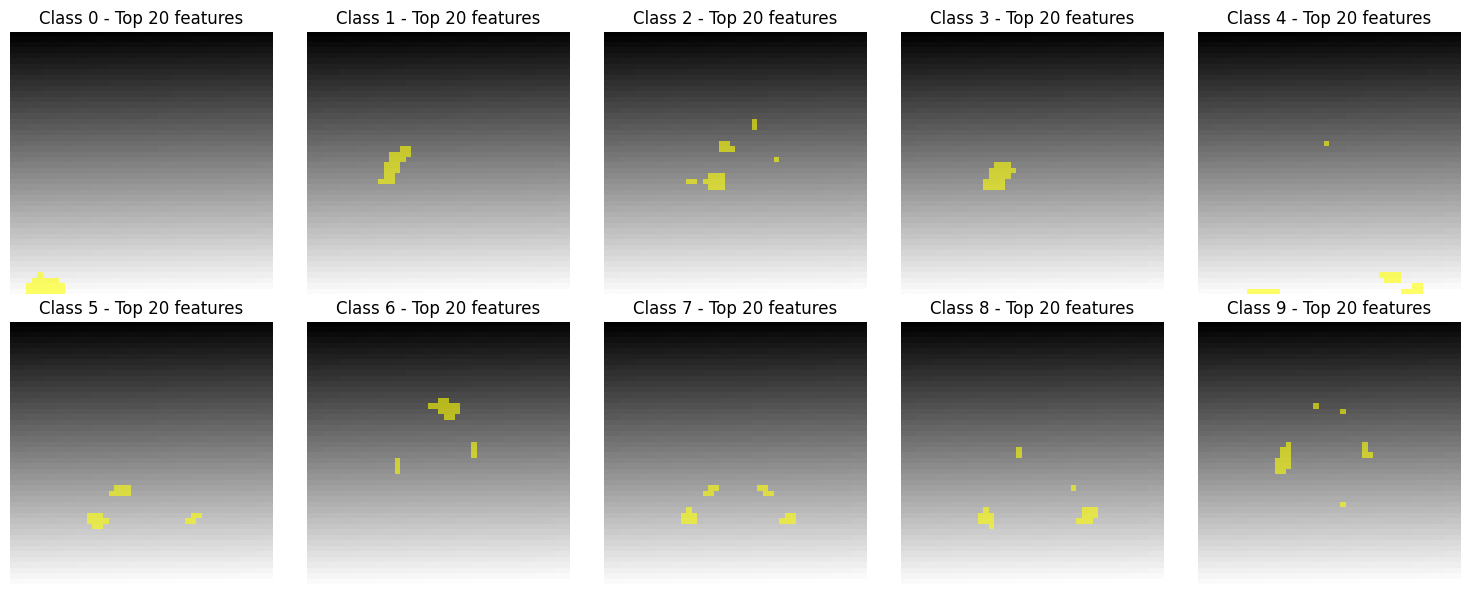

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_important_features(ax, image, important_features, title):
    # Create a mask of the same shape as the image, initialized with zeros
    mask = np.zeros_like(image)
    
    # Set the important features in the mask to 1
    for feature in important_features:
        row = feature // image.shape[1]
        col = feature % image.shape[1]
        mask[row, col] = 1
    
    # Plot original image on the given axis
    ax.imshow(image, cmap='gray')
    
    # Overlay important features colored in red
    ax.imshow(np.ma.masked_where(mask == 0, mask), cmap='autumn_r', alpha=0.6)
    
    ax.set_title(title)
    ax.axis('off')

# Take an example image from the dataset
example_image = X.values[0].reshape(48, 48)

def visualize_dataset_features(dataset, title_suffix):
    # Create a grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    # Extract the columns of the dataset to get the important features
    important_features_all = dataset.columns.tolist()

    # Plot the example image with important features highlighted for each class
    for label, ax in zip(top_features.keys(), axes.ravel()):
        # Intersect the features for this class with the dataset's features
        important_features = [feat for feat in top_features[label] if feat in important_features_all]
        plot_important_features(ax, example_image, important_features, f"Class {label} - {title_suffix}")

    plt.tight_layout()
    plt.show()

# Visualize the features for each reduced dataset
visualize_dataset_features(dataset_50, "Top 5 features")
visualize_dataset_features(dataset_100, "Top 10 features")
visualize_dataset_features(dataset_200, "Top 20 features")


In [19]:
# Function to evaluate GaussianNB on created datasets
def evaluate_dataset(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train.values.ravel())
    y_pred = gnb.predict(X_val)
    return classification_report(y_val, y_pred)

report_50 = evaluate_dataset(dataset_50, y)
report_100 = evaluate_dataset(dataset_100, y)
report_200 = evaluate_dataset(dataset_200, y)

print("Report fot top 50")
print(report_50)
print("Report fot top 100")
print(report_100)
print("Report fot top 200")
print(report_200)


Report fot top 50
              precision    recall  f1-score   support

           0       0.03      0.14      0.05        43
           1       0.62      0.48      0.54       444
           2       0.71      0.28      0.40       450
           3       0.29      0.41      0.34       282
           4       0.64      0.11      0.19       396
           5       0.50      0.21      0.30        42
           6       0.13      0.81      0.23        72
           7       0.31      0.52      0.39        48
           8       0.68      0.33      0.45       108
           9       0.23      0.74      0.35        54

    accuracy                           0.35      1939
   macro avg       0.41      0.40      0.32      1939
weighted avg       0.55      0.35      0.37      1939

Report fot top 100
              precision    recall  f1-score   support

           0       0.03      0.12      0.04        43
           1       0.63      0.48      0.54       444
           2       0.71      0.30      0.

### 2. Lasso regularization

In [73]:
from sklearn.linear_model import LassoCV

# Fit Lasso model with cross-validation to find the best alpha
lasso = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso.fit(X_train_standard, y_train_standard.values.ravel())

# Get features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]

selected_features

/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.229670809361778, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7963778206021743, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.313495343193608, tolerance: 2.9243482664086438
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ilya/mainvenv/lib/python3.10/site-packages/sklearn/linear_mode

KeyboardInterrupt: 

In [21]:
# We can see that we got only 568 features from original dataset
len(selected_features)

568

In [22]:
X_lasso = x_train_normalized[selected_features]

In [23]:
# Splitting the data into training and validation sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_lasso, y_train_lasso.values.ravel())
y_pred_lasso = gnb.predict(X_test_lasso)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_lasso)
class_report = classification_report(y_test, y_pred_lasso)

print(accuracy.round(3))
print(class_report)


0.275
              precision    recall  f1-score   support

           0       0.04      0.14      0.06        43
           1       0.61      0.35      0.45       444
           2       0.46      0.22      0.30       450
           3       0.39      0.24      0.29       282
           4       0.50      0.18      0.26       396
           5       0.19      0.24      0.21        42
           6       0.09      0.78      0.16        72
           7       0.12      0.54      0.19        48
           8       0.63      0.18      0.28       108
           9       0.31      0.37      0.34        54

    accuracy                           0.27      1939
   macro avg       0.33      0.32      0.25      1939
weighted avg       0.46      0.27      0.31      1939



### 3. Random Forest

Here We decided to create a Random Forest model, for sure it's accuracy is way higher, but it's not the main point.

Main point is to use `feature_importances_` method from `RandomForestClassifier` class. This is also one more way of feature selection.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.978
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.95      0.99      0.97       444
           2       0.98      0.98      0.98       450
           3       0.99      0.98      0.99       282
           4       0.99      0.99      0.99       396
           5       1.00      0.93      0.96        42
           6       0.99      0.94      0.96        72
           7       1.00      0.98      0.99        48
           8       0.97      0.97      0.97       108
           9       1.00      0.98      0.99        54

    accuracy                           0.98      1939
   macro avg       0.98      0.96      0.97      1939
weighted avg       0.98      0.98      0.98      1939



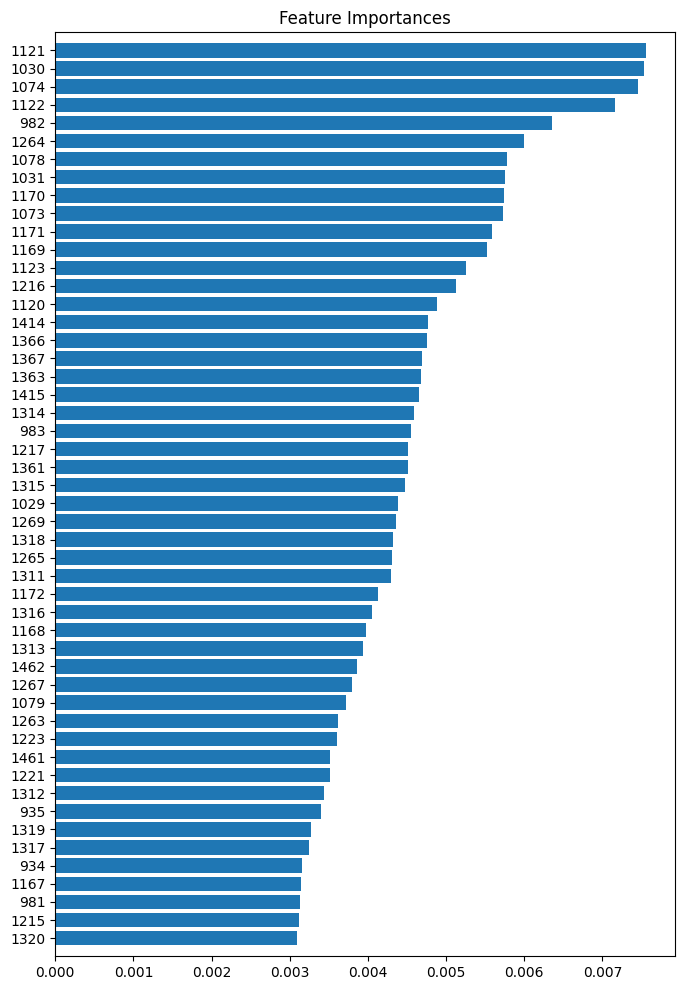

In [25]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Sort feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_rf[indices_rf[:n]], align="center")
plt.yticks(range(n), indices_rf[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [26]:
# We tried different number of features and "150" is the most efficient number of features
X_rf = x_train_normalized[indices_rf[:150]]
X_rf.head()

,1121,1030,1074,1122,982,1264,1078,1031,1170,1073,...,1135,1556,1071,1408,1370,1469,888,746,1457,1518
0,4.396078,4.039216,4.211765,4.400000,3.850980,4.956863,4.227451,4.043137,4.588235,4.207843,...,4.450980,6.101961,4.200000,5.521569,5.372549,5.760784,3.482353,2.925490,5.713725,5.952941
1,0.772549,0.607843,0.639216,0.749020,0.749020,0.917647,0.509804,0.705882,0.843137,0.682353,...,0.623529,0.772549,0.709804,0.690196,0.580392,0.705882,0.964706,0.372549,0.607843,0.831373
2,0.796078,0.517647,0.764706,0.796078,0.552941,0.760784,0.607843,0.533333,0.854902,0.752941,...,0.658824,0.678431,0.419608,0.556863,0.674510,0.690196,0.937255,0.596078,0.592157,0.807843
3,0.811765,0.529412,0.701961,0.772549,0.556863,0.890196,0.650980,0.470588,0.850980,0.749020,...,0.517647,0.768627,0.721569,0.701961,0.505882,0.717647,0.921569,0.792157,0.627451,0.843137
4,0.854902,0.498039,0.811765,0.854902,0.533333,0.882353,0.478431,0.525490,0.854902,0.800000,...,0.450980,0.733333,0.768627,0.635294,0.529412,0.823529,0.819608,0.866667,0.600000,0.823529


#### Applying Gaussian Naive Bayes on dataset gotted from Random Forest model

In [27]:
# Splitting the data into training and validation sets
X_train_rf, X_tes_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rf, y_train_rf.values.ravel())
y_pred_rf = gnb.predict(X_tes_rf)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)


0.362
              precision    recall  f1-score   support

           0       0.01      0.07      0.02        43
           1       0.57      0.45      0.50       444
           2       0.71      0.21      0.33       450
           3       0.33      0.79      0.47       282
           4       0.50      0.01      0.01       396
           5       0.82      0.21      0.34        42
           6       0.37      0.60      0.46        72
           7       0.59      0.50      0.54        48
           8       0.74      0.52      0.61       108
           9       0.15      0.81      0.26        54

    accuracy                           0.36      1939
   macro avg       0.48      0.42      0.35      1939
weighted avg       0.54      0.36      0.34      1939



#### We can see that this method gives us a better accuracy

### 4. Catboost - Gradient Boosting

In [28]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=100, random_seed=42)

cb_model.fit(X_train, y_train)

y_pred_cb = cb_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_cb)
class_report = classification_report(y_test, y_pred_cb)

print(accuracy.round(3))
print(class_report)

Learning rate set to 0.5
0:	learn: 1.6355457	total: 469ms	remaining: 46.4s
1:	learn: 1.3982543	total: 866ms	remaining: 42.4s
2:	learn: 1.2615429	total: 1.26s	remaining: 40.8s
3:	learn: 1.1235347	total: 1.67s	remaining: 40.1s
4:	learn: 1.0535007	total: 2.07s	remaining: 39.3s
5:	learn: 1.0105312	total: 2.47s	remaining: 38.7s
6:	learn: 0.9493483	total: 2.87s	remaining: 38.1s
7:	learn: 0.8846421	total: 3.27s	remaining: 37.6s
8:	learn: 0.8532674	total: 3.67s	remaining: 37.1s
9:	learn: 0.7858531	total: 4.08s	remaining: 36.7s
10:	learn: 0.7551665	total: 4.5s	remaining: 36.4s
11:	learn: 0.7127844	total: 4.91s	remaining: 36s
12:	learn: 0.6966177	total: 5.31s	remaining: 35.5s
13:	learn: 0.6709921	total: 5.72s	remaining: 35.1s
14:	learn: 0.6278381	total: 6.13s	remaining: 34.8s
15:	learn: 0.5852147	total: 6.57s	remaining: 34.5s
16:	learn: 0.5517065	total: 6.98s	remaining: 34.1s
17:	learn: 0.5304509	total: 7.39s	remaining: 33.7s
18:	learn: 0.5109464	total: 7.81s	remaining: 33.3s
19:	learn: 0.498067

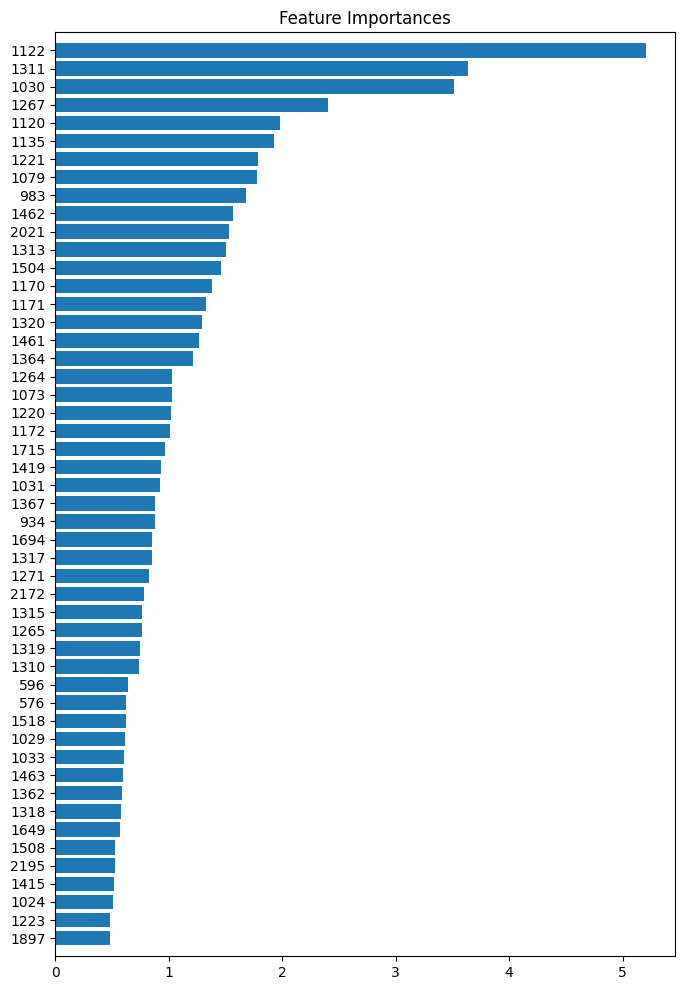

In [29]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_cb = cb_model.get_feature_importance()

# Sort feature importances in descending order and get the indices
indices_cb = np.argsort(importances_cb)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_cb[indices_cb[:n]], align="center")
plt.yticks(range(n), indices_cb[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [30]:
# We tried different number of features and "100" is the most efficient number of features
X_cb = x_train_normalized[indices_cb[:100]]
X_cb.head()

,1122,1311,1030,1267,1120,1135,1221,1079,983,1462,...,2286,1215,269,1343,842,1601,1121,1610,621,1602
0,4.400000,5.141176,4.039216,4.968627,4.392157,4.450980,4.788235,4.231373,3.854902,5.733333,...,8.964706,4.764706,1.054902,5.266667,3.301961,6.278431,4.396078,6.313725,2.435294,6.282353
1,0.749020,0.835294,0.607843,0.776471,0.811765,0.623529,0.627451,0.552941,0.803922,0.600000,...,0.549020,0.862745,0.890196,0.368627,0.800000,0.443137,0.772549,0.925490,0.274510,0.588235
2,0.796078,0.443137,0.517647,0.800000,0.717647,0.658824,0.654902,0.509804,0.639216,0.521569,...,0.388235,0.486275,0.796078,0.337255,0.921569,0.380392,0.796078,0.929412,0.278431,0.392157
3,0.772549,0.705882,0.529412,0.698039,0.827451,0.517647,0.533333,0.611765,0.647059,0.607843,...,0.384314,0.768627,0.447059,0.325490,0.866667,0.423529,0.811765,0.913725,0.266667,0.513725
4,0.854902,0.666667,0.498039,0.541176,0.890196,0.450980,0.509804,0.568627,0.560784,0.670588,...,0.360784,0.807843,0.278431,0.317647,0.772549,0.313725,0.854902,0.850980,0.258824,0.388235


In [31]:
# Splitting the data into training and validation sets
X_train_cb, X_tes_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_cb, y_train_cb.values.ravel())
y_pred_cb = gnb.predict(X_tes_cb)

# Calculating the metrics
class_report = classification_report(y_test, y_pred_cb)

print(class_report)


              precision    recall  f1-score   support

           0       0.02      0.07      0.02        43
           1       0.67      0.47      0.55       444
           2       0.75      0.33      0.45       450
           3       0.34      0.77      0.47       282
           4       0.67      0.07      0.12       396
           5       0.82      0.21      0.34        42
           6       0.27      0.58      0.37        72
           7       0.50      0.52      0.51        48
           8       0.84      0.49      0.62       108
           9       0.16      0.81      0.27        54

    accuracy                           0.40      1939
   macro avg       0.50      0.43      0.37      1939
weighted avg       0.60      0.40      0.40      1939



### 5. PCA

In [32]:
from sklearn.decomposition import PCA

# Exacly this number of components gave the best F1-score
n_components=175
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)


The explained variance in PCA provides insight into the amount of information (or variance) that is captured by each principal component and by the selected components combined.

In [33]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Principal Component: {explained_variance}")
print(f"Total Variance Explained by 100 Principal Components: {np.sum(explained_variance)}")

Explained Variance by Each Principal Component: [4.98729350e-01 1.66085739e-01 5.28167190e-02 2.89319471e-02
 2.78406389e-02 1.86943641e-02 1.42519190e-02 1.21904986e-02
 9.48729236e-03 8.53064111e-03 7.19769284e-03 6.44124965e-03
 5.89957855e-03 5.41206826e-03 4.81311239e-03 4.40800947e-03
 4.24258949e-03 4.01994133e-03 3.77459039e-03 3.60736877e-03
 3.22618255e-03 2.63005153e-03 2.51386180e-03 2.47910964e-03
 2.27667582e-03 2.20754988e-03 2.16346483e-03 2.08907352e-03
 1.98228143e-03 1.88908770e-03 1.76746821e-03 1.71328361e-03
 1.65607582e-03 1.60609918e-03 1.51760987e-03 1.45974554e-03
 1.45627748e-03 1.37959143e-03 1.31127629e-03 1.25920939e-03
 1.24209192e-03 1.17472143e-03 1.11446221e-03 1.10397276e-03
 1.08675199e-03 1.04596017e-03 1.03463175e-03 9.82344879e-04
 9.75745000e-04 9.28726189e-04 9.06016576e-04 8.92343647e-04
 8.41969874e-04 8.30842528e-04 8.12945273e-04 7.98896392e-04
 7.90029897e-04 7.85995761e-04 7.51163424e-04 7.37312575e-04
 7.10276224e-04 7.06536231e-04 6.6804

In [34]:
# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = gnb.predict(X_test_pca)

# Calculating the metrics
class_report_pca = classification_report(y_test, y_pred_pca)

print(class_report_pca)


              precision    recall  f1-score   support

           0       0.45      0.44      0.45        43
           1       0.55      0.36      0.44       444
           2       0.52      0.22      0.31       450
           3       0.43      0.70      0.53       282
           4       0.56      0.71      0.62       396
           5       0.91      0.50      0.65        42
           6       0.53      0.81      0.64        72
           7       0.97      0.69      0.80        48
           8       0.28      0.53      0.37       108
           9       0.29      0.44      0.35        54

    accuracy                           0.49      1939
   macro avg       0.55      0.54      0.52      1939
weighted avg       0.52      0.49      0.47      1939



### 6. Resizing the images

In [35]:
from skimage.transform import resize

def resize_images(dataset, original_shape, target_shape):
    # dataset: A pandas DataFrame with shape (num_samples, original_shape[0] * original_shape[1])
    # original_shape: A tuple indicating the original shape of each image (height, width)
    # target_shape: A tuple indicating the target shape for each resized image (height, width)

    resized_data = []
    
    for index, row in dataset.iterrows():
        # Reshape the flattened image to its original shape
        image = row.values.reshape(original_shape)
        
        # Resize the image
        resized_image = resize(image, target_shape, anti_aliasing=True)
        
        # Flatten the resized image and append to the list
        resized_data.append(resized_image.flatten())
    
    return pd.DataFrame(resized_data)

# Example usage
original_shape = (48, 48)
target_shape = (24, 24)

# Assuming X is your dataset in the form of a pandas DataFrame
X_resized = resize_images(X, original_shape, target_shape)


In [36]:
# Splitting the data into training and validation sets
X_train_resized, X_tes_resized, y_train_resized, y_test_resized = train_test_split(X_resized, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_resized, y_train_resized.values.ravel())
y_pred_resized = gnb.predict(X_tes_resized)

# Calculating the metrics
class_report_resized = classification_report(y_test_resized, y_pred_resized)

print(class_report_resized)


              precision    recall  f1-score   support

           0       0.05      0.16      0.08        43
           1       0.55      0.32      0.41       444
           2       0.43      0.20      0.27       450
           3       0.42      0.20      0.27       282
           4       0.57      0.13      0.22       396
           5       0.08      0.33      0.13        42
           6       0.09      0.72      0.16        72
           7       0.11      0.60      0.18        48
           8       0.47      0.14      0.21       108
           9       0.32      0.30      0.31        54

    accuracy                           0.25      1939
   macro avg       0.31      0.31      0.22      1939
weighted avg       0.45      0.25      0.28      1939



## Displaying the most important features from different methods of feature selection

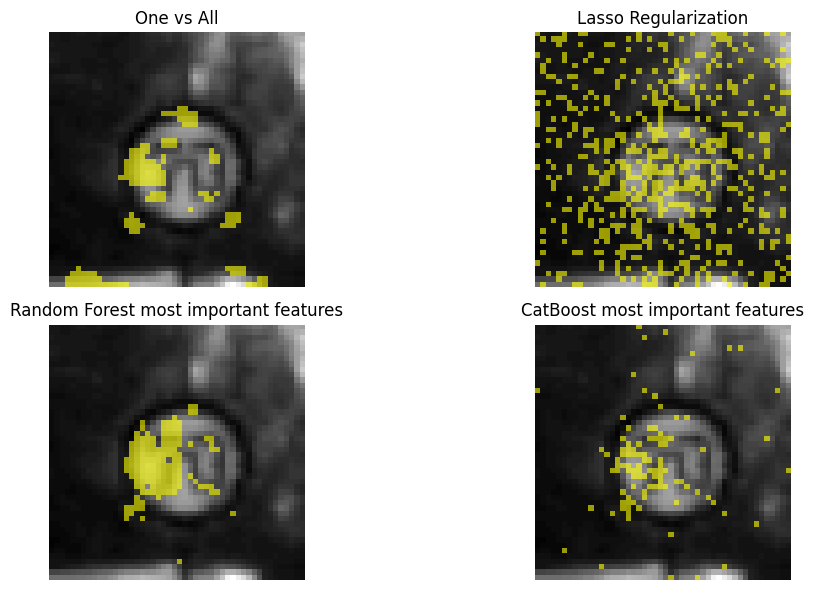

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_important_features(ax, image, important_features, title):

    # Create a mask of the same shape as the image, initialized with zeros
    mask = np.zeros_like(image)
    
    # Set the important features in the mask to 1
    for feature in important_features:
        row = feature // image.shape[1]
        col = feature % image.shape[1]
        mask[row, col] = 1
    
    # Plot original image on the provided axis
    ax.imshow(image, cmap='gray')
    
    # Overlay important features colored in red on the provided axis
    ax.imshow(np.ma.masked_where(mask == 0, mask), cmap='autumn_r', alpha=0.6)
    
    ax.set_title(title)
    ax.axis('off')

# Take an example image from the dataset
example_image = X_train.values[0].reshape(48, 48)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot the example image with important features highlighted for each method on the subplots
methods = [
    (dataset_200.columns, "One vs All"),
    (selected_features, "Lasso Regularization"),
    (indices_rf[:150], "Random Forest most important features"),
    (indices_cb[:100], "CatBoost most important features")
]

for (features, title), ax in zip(methods, axes.ravel()):
    plot_important_features(ax, example_image, features, title)

plt.tight_layout()
plt.show()


#### Visualize the Principal Components (Eigenvectors - Eigenimages)
These eigenvectors represent the principal components in image form and can give an idea of the kinds of patterns that PCA has detected in the dataset

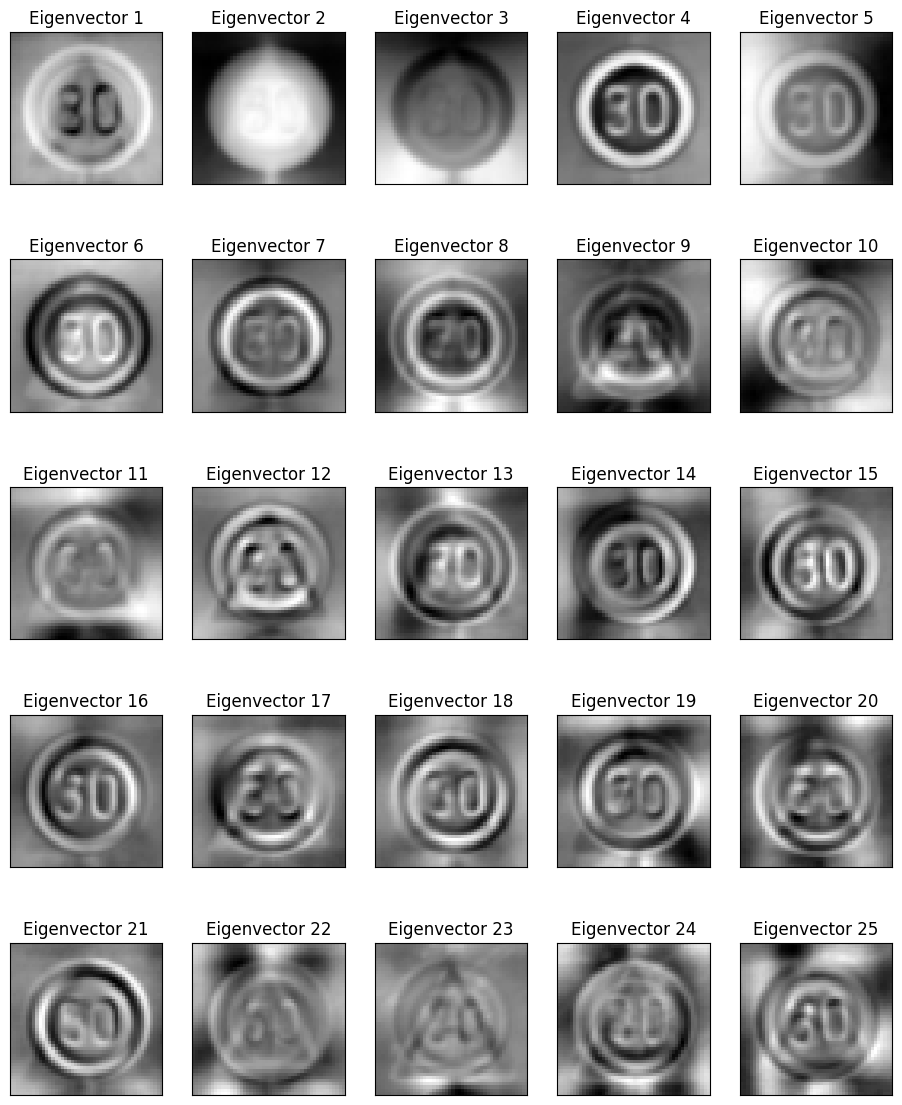

In [39]:
import matplotlib.pyplot as plt

def plot_eigenimages(images, h, w, n_row=5, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenvector {i+1}", size=12)
        plt.xticks(())
        plt.yticks(())

# The size of the original images
h, w = 48, 48

eigenimages = pca.components_.reshape((n_components, h, w))

plot_eigenimages(eigenimages, h, w)

These visualizations don't represent actual images from the dataset but rather patterns that PCA has detected in the dataset. The first few eigenvectors (principal components) will typically capture broad patterns, and higher-order components might capture more specific or subtle patterns

## Final evaluation of the Gaussian Naive Bayes model on the chosen dataset with all metrics

#### We chose the dataset from Catboost model as the final one for evaluating the model

In [40]:
# Applying Gaussian Naive Bayes to the PCA dataset
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = gnb.predict(X_test_pca)

# Calculating the metrics
class_report_pca = classification_report(y_test, y_pred_pca)

print(class_report_pca)


              precision    recall  f1-score   support

           0       0.45      0.44      0.45        43
           1       0.55      0.36      0.44       444
           2       0.52      0.22      0.31       450
           3       0.43      0.70      0.53       282
           4       0.56      0.71      0.62       396
           5       0.91      0.50      0.65        42
           6       0.53      0.81      0.64        72
           7       0.97      0.69      0.80        48
           8       0.28      0.53      0.37       108
           9       0.29      0.44      0.35        54

    accuracy                           0.49      1939
   macro avg       0.55      0.54      0.52      1939
weighted avg       0.52      0.49      0.47      1939



#### True Positives (TP) and False Positives (FP)

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_pca)

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP

TP_dict = {label: tp for label, tp in enumerate(TP)}
FP_dict = {label: fp for label, fp in enumerate(FP)}

print("True Positives (TP) for each class:")
for key, value in TP_dict.items():
    print(f"{key}: {value}")

print("\nFalse Positives (FP) for each class:")
for key, value in FP_dict.items():
    print(f"{key}: {value}")



True Positives (TP) for each class:
0: 19
1: 162
2: 98
3: 196
4: 281
5: 21
6: 58
7: 33
8: 57
9: 24

False Positives (FP) for each class:
0: 23
1: 132
2: 91
3: 264
4: 223
5: 2
6: 51
7: 1
8: 145
9: 58


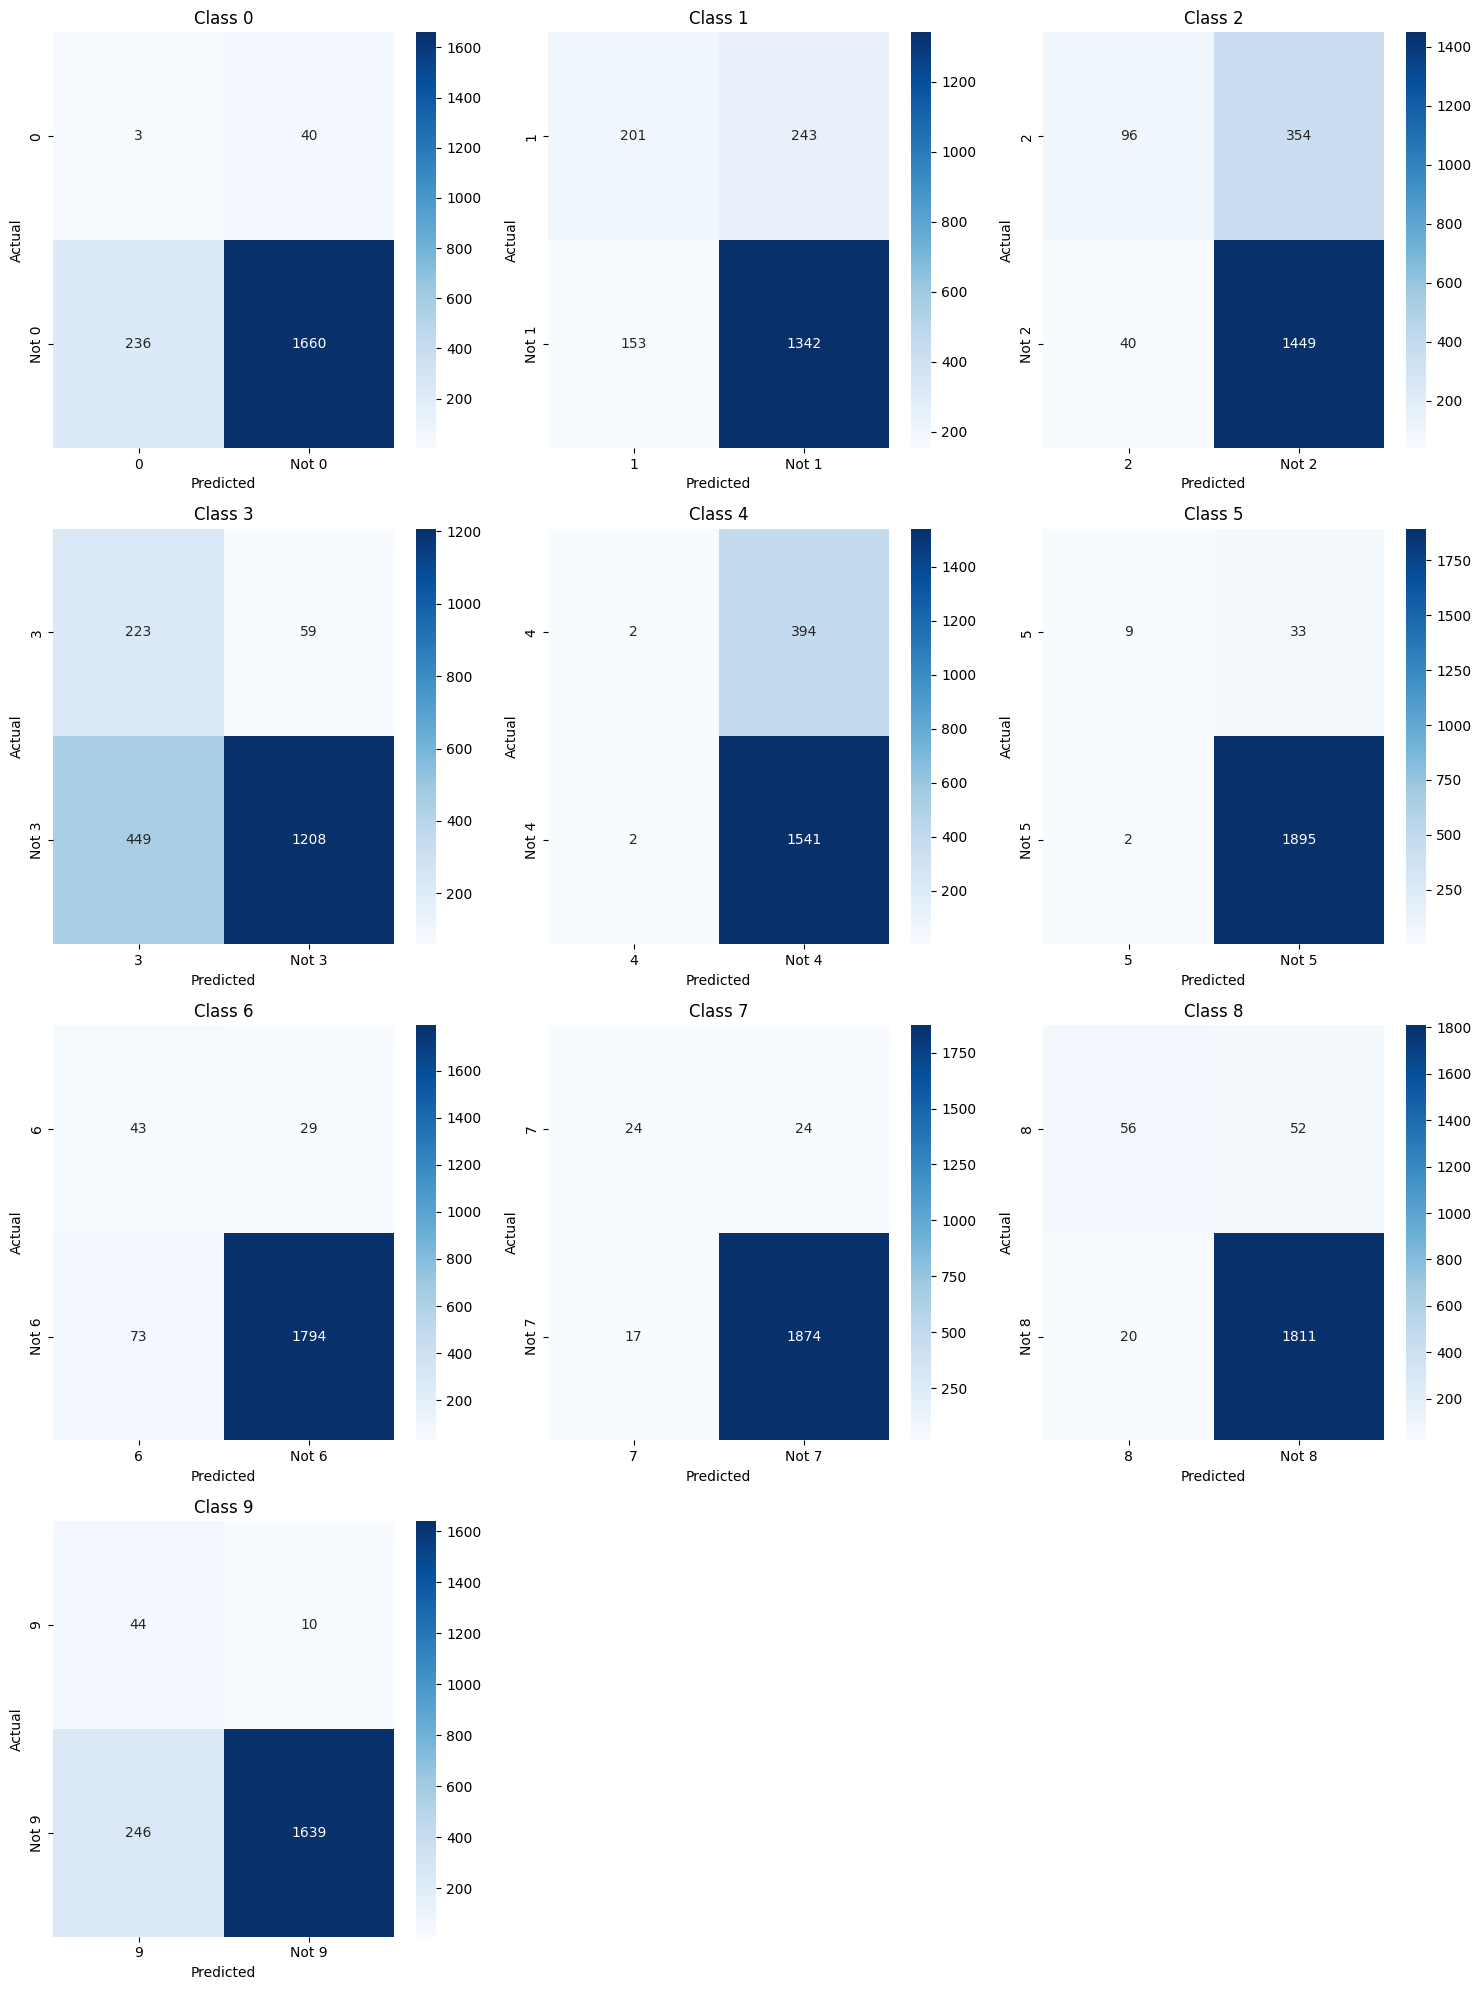

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_binary_confusion_matrix(ax, y_true, y_pred, class_name):
    """Generate and plot a binary confusion matrix for a given class."""
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=[class_name, f'Not {class_name}'], 
                yticklabels=[class_name, f'Not {class_name}'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Class {class_name}')

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = y_pred_rf

# Calculate number of rows and columns for subplots
n_cols = 3  # For instance, 3 plots per row
n_rows = math.ceil(len(classes) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.ravel()

for idx, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    plot_binary_confusion_matrix(axes[idx], y_true_binary, y_pred_binary, class_label)

# Remove any remaining subplots
for idx in range(len(classes), n_rows * n_cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#### ROC-AUC for Each Class
Since ROC-AUC is typically used for binary classification, for multiclass problems, we'll compute a ROC-AUC for each class by treating it as binary (One-vs-All approach).

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred_pca, classes=classes)

roc_auc_dict = {}
for i, class_label in enumerate(classes):
    roc_auc_dict[class_label] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

for key, value in roc_auc_dict.items():
    print(f"{key}: {value:.2f}")


0: 0.71
1: 0.64
2: 0.58
3: 0.77
4: 0.78
5: 0.75
6: 0.89
7: 0.84
8: 0.72
9: 0.71


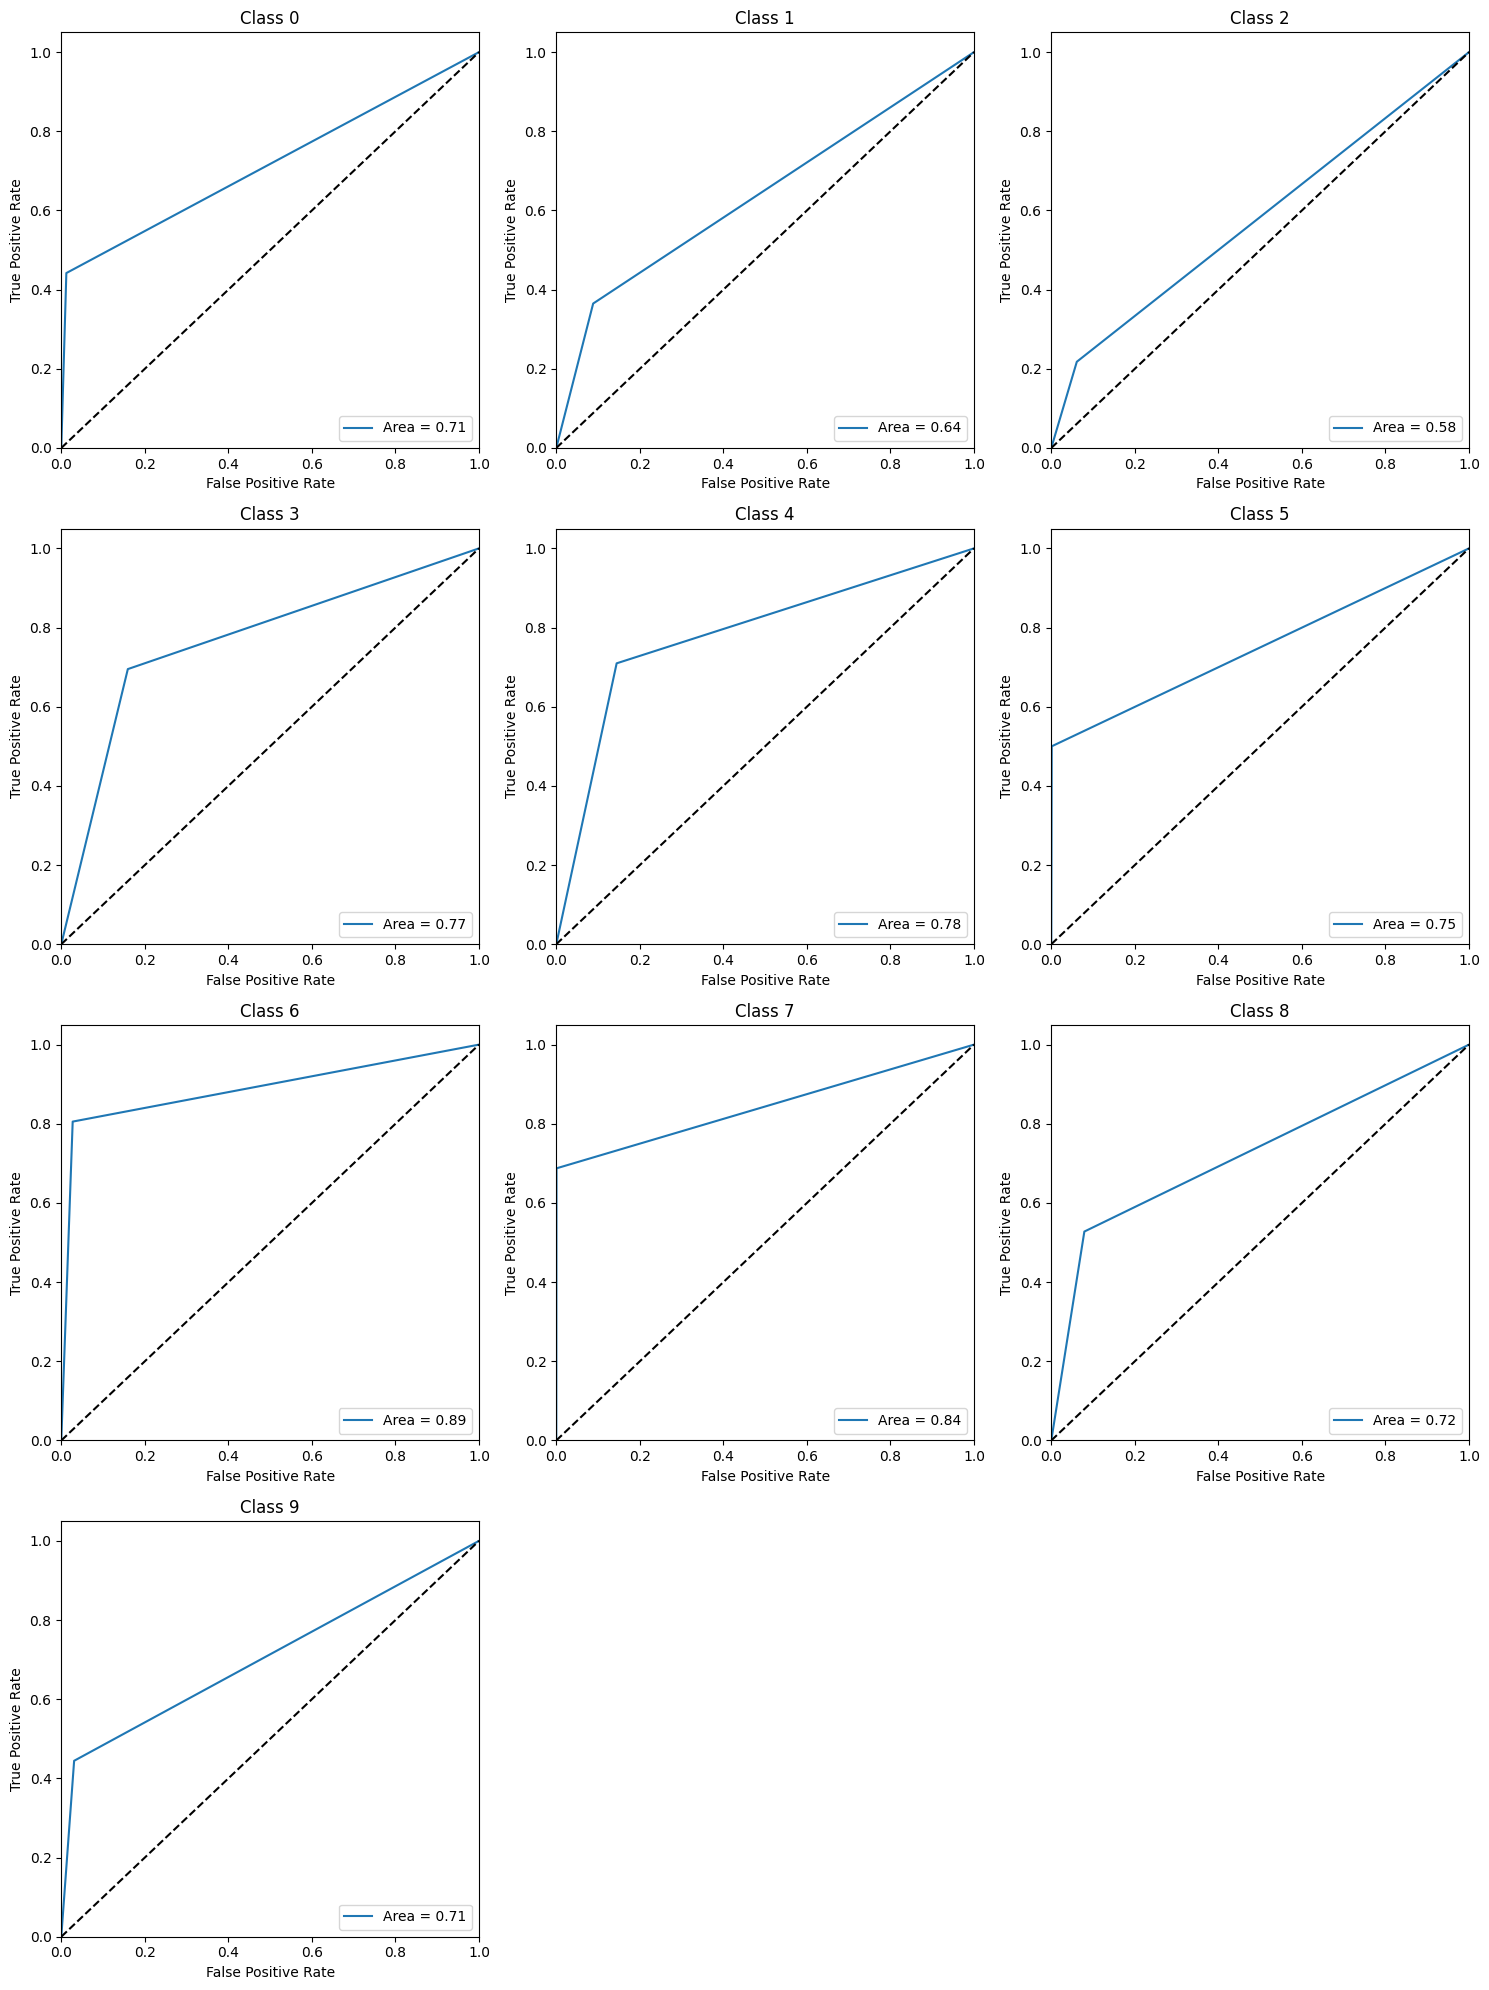

In [122]:
import math

# Calculate number of rows and columns for subplots
n_cols = 3  # For instance, 3 plots per row
n_rows = math.ceil(len(classes) / n_cols)

# Initialize the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes to make it easier to iterate over
axes = axes.ravel()

# Plot ROC curve for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    axes[i].plot(fpr, tpr, label=f'Area = {roc_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'Class {class_label}')
    axes[i].legend(loc="lower right")

# Remove any remaining empty subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

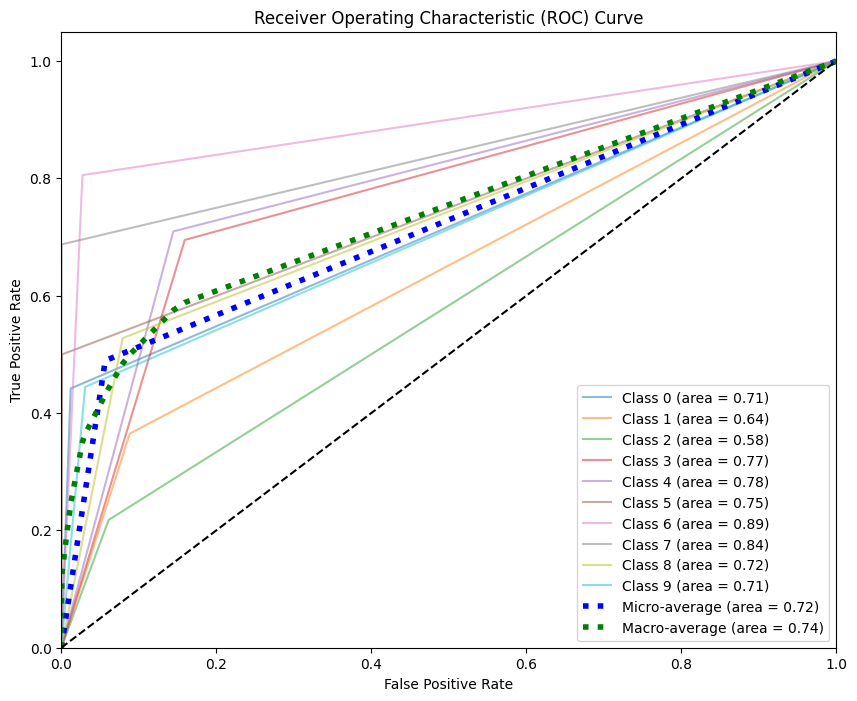

In [123]:
# Initialize the figure
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (area = {roc_auc:.2f})', alpha=0.5)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, linestyle=':', linewidth=4, color='blue', label=f'Micro-average (area = {roc_auc_micro:.2f})')

# Calculate the macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([roc_curve(y_test_bin[:, i], y_pred_bin[:, i])[0] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, linestyle=':', linewidth=4, color='green', label=f'Macro-average (area = {roc_auc_macro:.2f})')

# Plot random prediction (strategy of always predicting 0.5)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

#### PR-AUC (Precision-Recall Area Under Curve)

In [ ]:
from sklearn.metrics import average_precision_score

pr_auc_dict = {}
for i, class_label in enumerate(classes):
    pr_auc_dict[class_label] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

for key, value in pr_auc_dict.items():
    print(f"{key}: {value:.2f}")

0: 0.21
1: 0.35
2: 0.29
3: 0.34
4: 0.45
5: 0.47
6: 0.44
7: 0.68
8: 0.18
9: 0.15


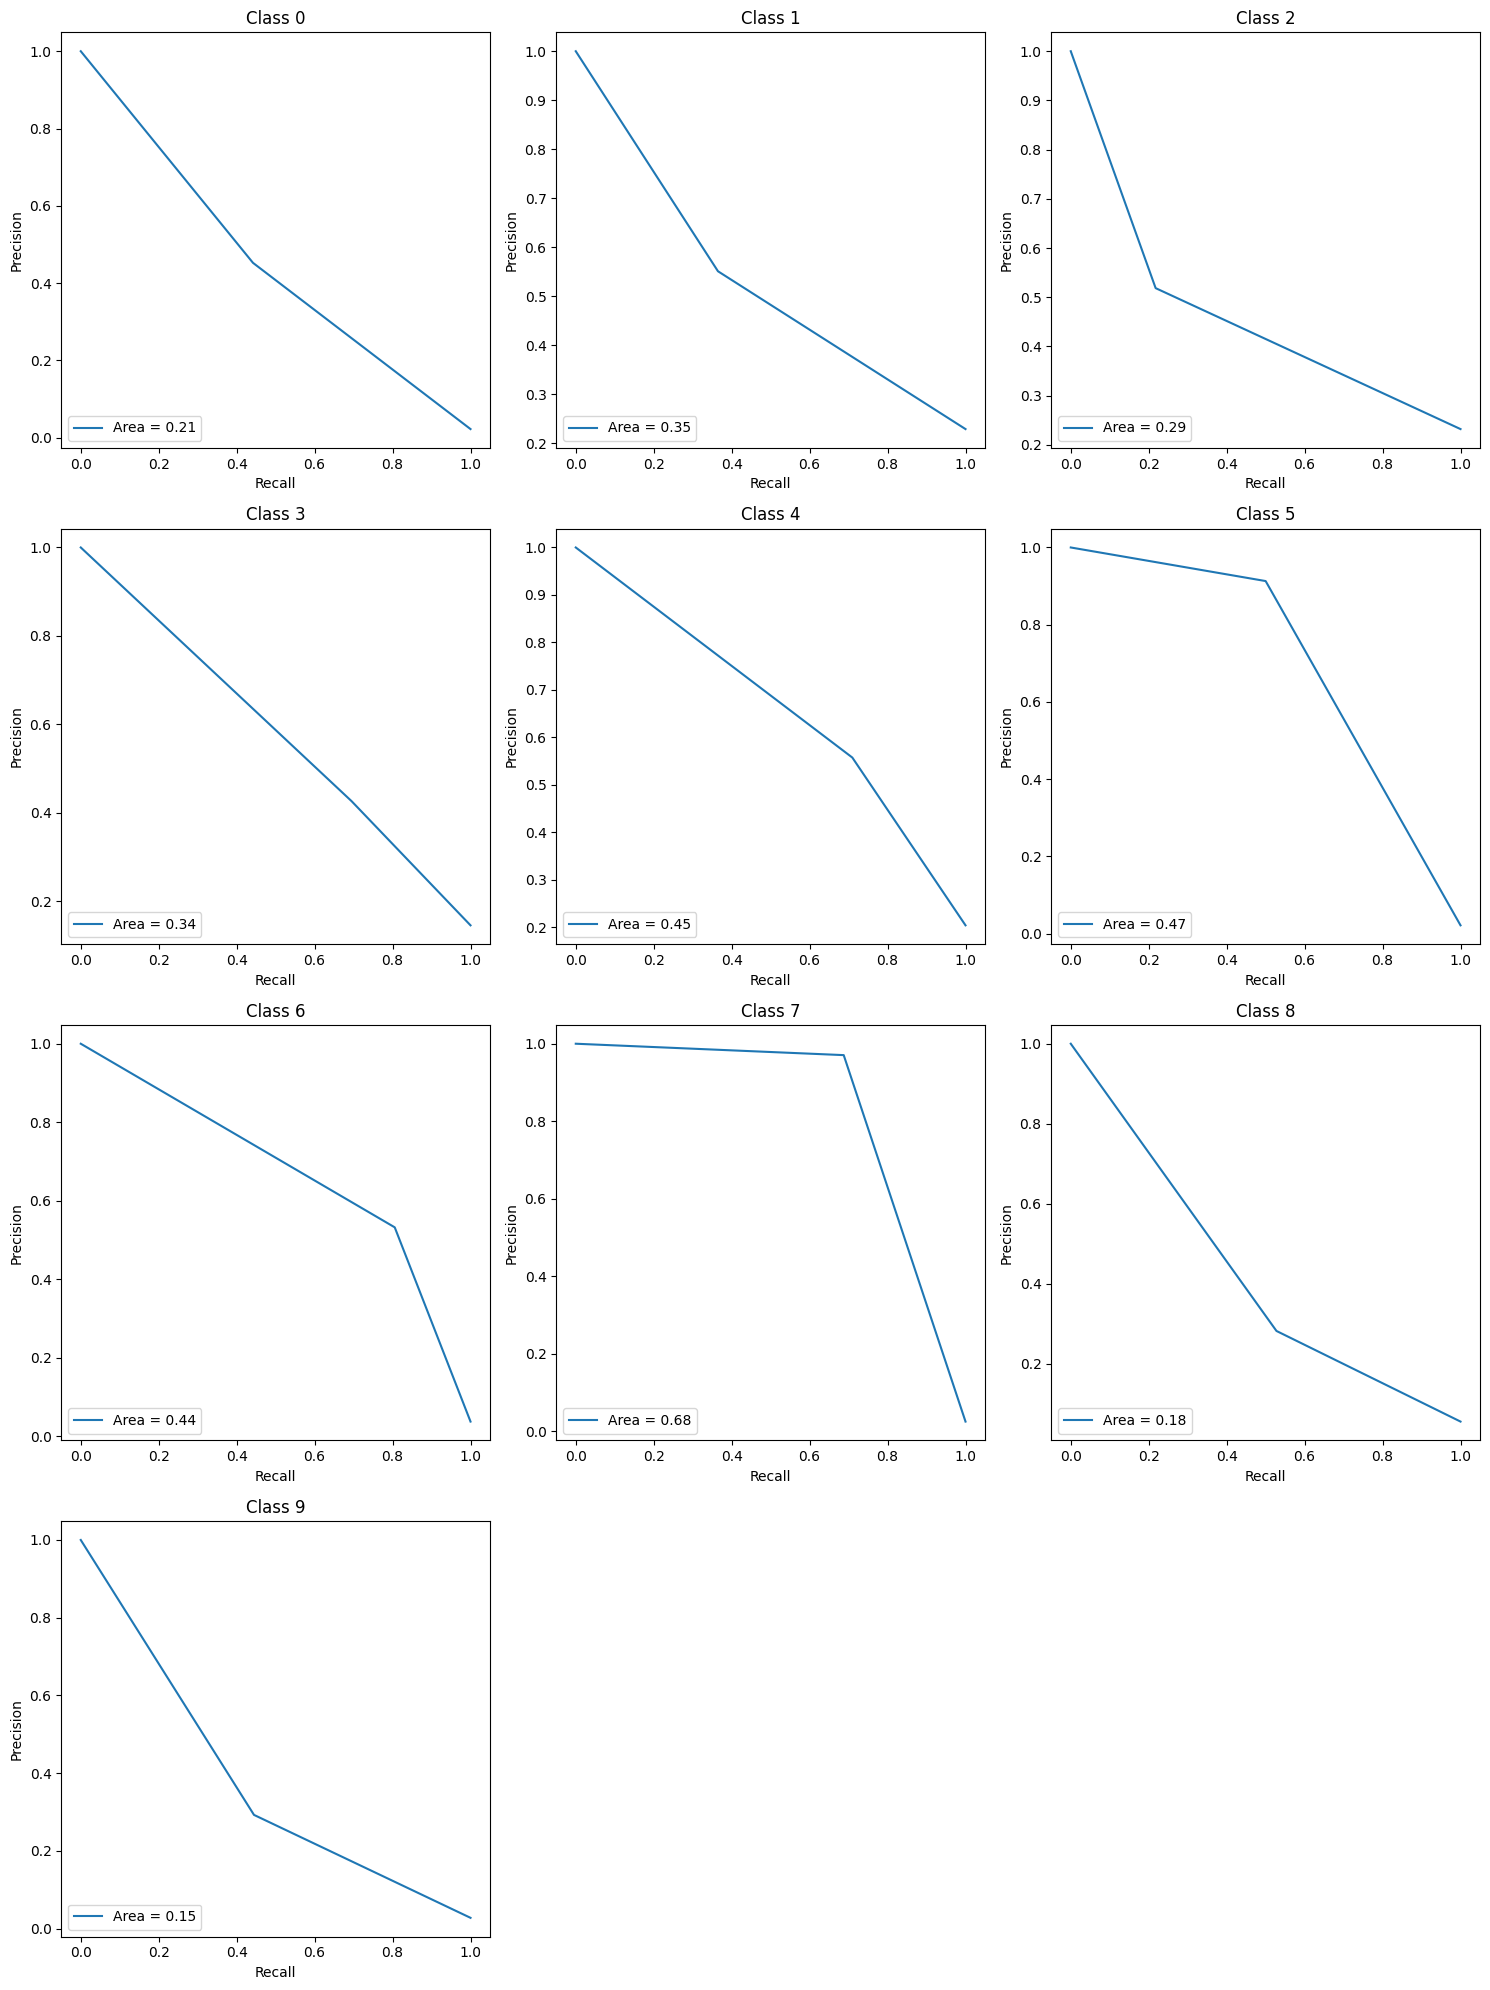

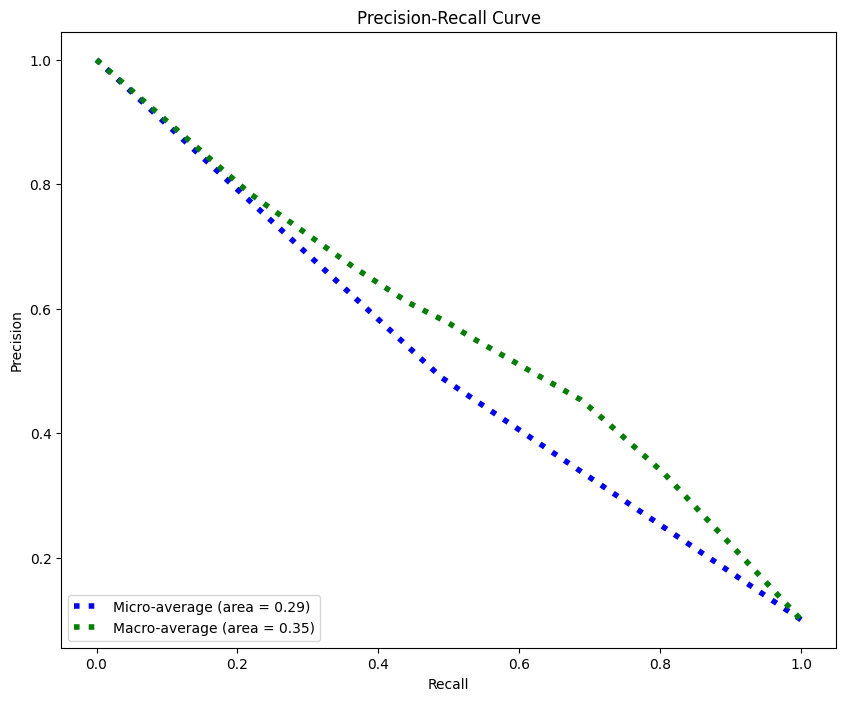

In [124]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plotting the individual PR curves for each class
n_cols = 3  # For instance, 3 plots per row
n_rows = math.ceil(len(classes) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.ravel()

for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])
    
    axes[i].plot(recall, precision, label=f'Area = {average_precision:.2f}')
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Class {class_label}')
    axes[i].legend(loc="lower left")

# Remove any remaining empty subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Computing and plotting the micro-average and macro-average PR curves
plt.figure(figsize=(10, 8))

# Micro-average PR curve
precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())
average_precision_micro = average_precision_score(y_test_bin, y_pred_bin, average="micro")
plt.plot(recall_micro, precision_micro, linestyle=':', linewidth=4, color='blue', label=f'Micro-average (area = {average_precision_micro:.2f})')

# Macro-average PR curve
recall_all = np.unique(np.concatenate([precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])[1] for i in range(n_classes)]))
mean_precision = np.zeros_like(recall_all)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    mean_precision += np.interp(recall_all, recall[::-1], precision[::-1])  # reverse recall values
mean_precision /= n_classes
average_precision_macro = np.mean([average_precision_score(y_test_bin[:, i], y_pred_bin[:, i]) for i in range(n_classes)])
plt.plot(recall_all, mean_precision, linestyle=':', linewidth=4, color='green', label=f'Macro-average (area = {average_precision_macro:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

Based on the presented PR curves:

1. **Individual Class Analysis**:
we noticed that the model has varied performance against different classes, as it shows great resultsfor class 7 where as class 0,2,8 and 9 have relatively poor performance indicated by low auc values.

   
2. **Macro and Micro Averages**:
   - The micro-averaged PR curve has an AUC of 0.29. Micro-averaging gives equal weight to each instance/observation, and this lower value indicates that there might be a larger number of instances in the classes where the model performs poorly.
   - The macro-averaged PR curve has an AUC of 0.35. Macro-averaging gives equal weight to each class. This value being higher than the micro-average suggests that while the model may be performing poorly on some classes, it's not performing equally poorly on all classes.
   

this perfomance issue  of class 0, 8 and 9 could be attributed to its lower sample size.

### Confusion Matrix for PCA

In [103]:
conf_mx_pca = confusion_matrix(y_test, y_pred_pca)

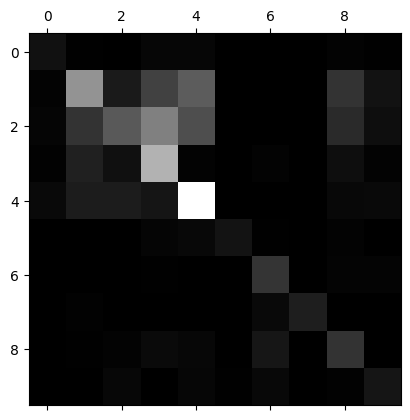

In [108]:
plt.matshow(conf_mx_pca, cmap=plt.cm.gray)
plt.show()

In [111]:
row_sums = conf_mx_pca.sum(axis=1, keepdims=True)
norm_conf_mx_rf = conf_mx_pca / row_sums

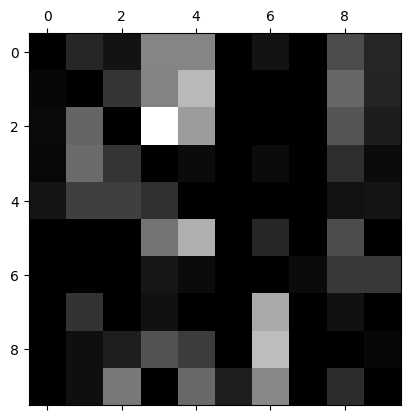

In [112]:
np.fill_diagonal(norm_conf_mx_rf, 0)
plt.matshow(norm_conf_mx_rf, cmap=plt.cm.gray)

plt.show()